# Transportation Problem

## Solving with CBC - Open Source Solver

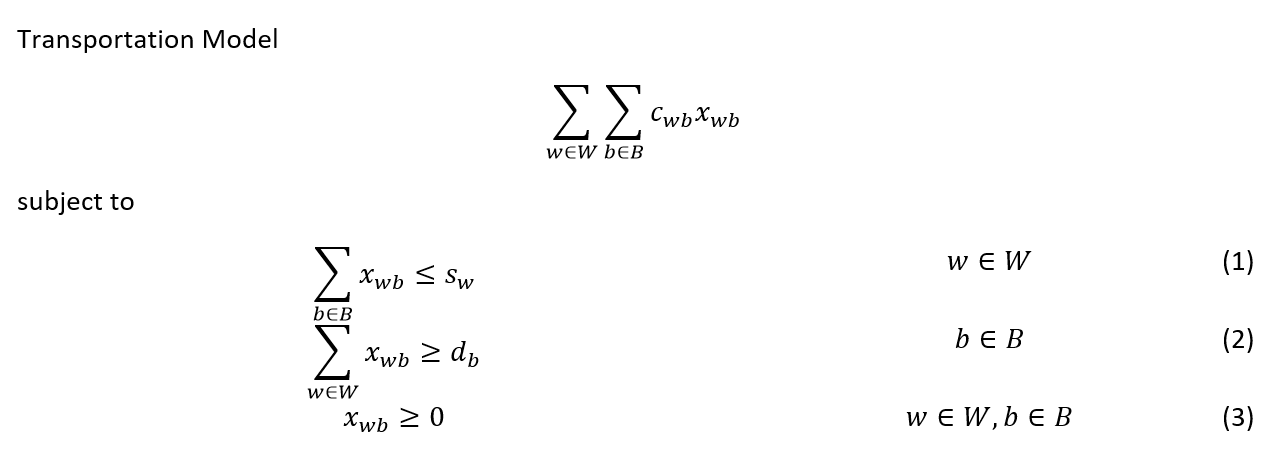

In [21]:
from IPython.display import Image
Image(filename='TransportationProblem.png') 

### 1. Import PuLP modeller functions

In [22]:
from pulp import*

In [ ]:
from pulp import*
Warehouses = ["A", "B", "C"] # our supply points --- w
Bars = ["1", "2", "3", "4", "5"] #our demand points --- b

Prod = {"A": 1000,"B": 2000}

Sales = {"1": 1500,"2": 600,"3": 700,"4": 200}

Cost = {"A": {"1":2, "2":4, "3":5,"4":2},
        "B": {"1":3,"2":1,"3":3, "4":2}}

prob = LpProblem("Beer_Distribution_Problem", LpMinimize)

Y = LpVariable.dicts("y",(Factory, Shop), lowBound = 0, upBound = None, cat = const.LpInteger)

prob += lpSum(Cost[w][b]*X[w][b] for w in  for b in Bars)

for w in Warehouses:
    prob += lpSum(X[w][b] for b in Bars) <= Supply[w]

for b in Bars:
    prob += lpSum(X[w][b] for w in Warehouses) >= Demand[b]

### 2. Define required parameters

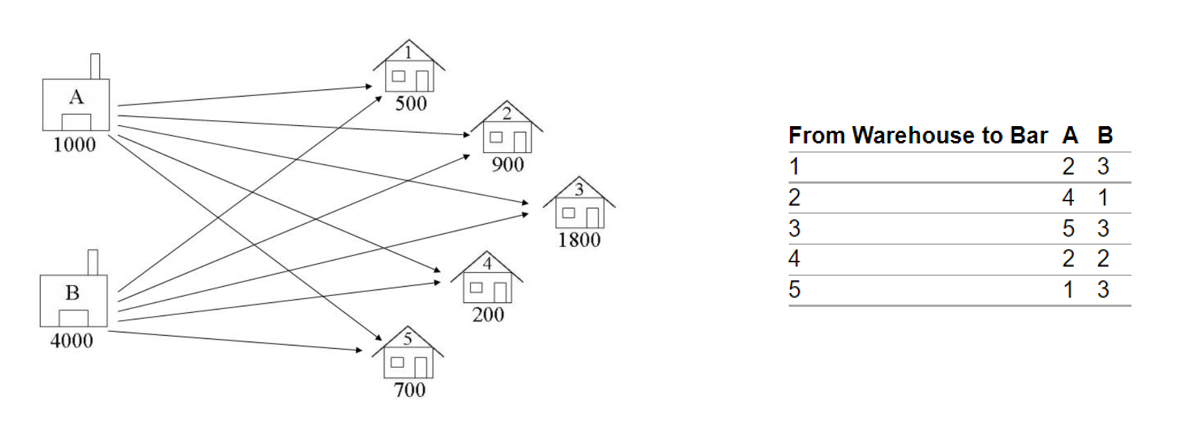

In [23]:
Image(filename='ProblemParameters.png') 

In [51]:
Warehouses = ["A", "B", "C"] # our supply points --- w
Bars = ["1", "2", "3", "4", "5"] #our demand points --- b

Supply = {"A": 1000, 
          "B": 3000,
          "C": 2000}

Demand = {"1": 1500,
          "2": 900,
          "3": 1800,
          "4": 200,
          "5": 700}

Cost = {"A": {"1":2,
              "2":4,
              "3":5,
              "4":2,
              "5":1},
        "B": {"1":3,
              "2":1,
              "3":3,
              "4":2,
              "5":3},
       "C": {"1":2,
              "2":4,
              "3":5,
              "4":2,
              "5":1}}

### 3. Creates the prob variable to contain the problem data

In [52]:
prob = LpProblem("Beer_Distribution_Problem", LpMinimize)

### 4. Define decision variable

In [53]:
X = LpVariable.dicts("x",
                     (Warehouses, Bars),
                     lowBound = 0,
                     upBound = None,
                     cat = const.LpInteger)

### 5. Define objective function

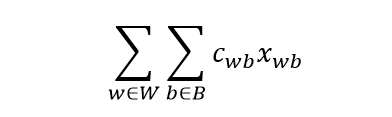

In [54]:
Image(filename='Objective.png') 

In [55]:
prob += lpSum(Cost[w][b]*X[w][b] for w in Warehouses for b in Bars)

### 6. Define constraints

#### Constraint 1

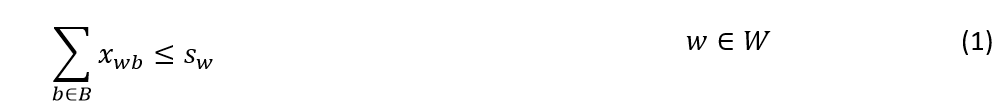

In [56]:
Image(filename='Constraint1.png') 

In [57]:
for w in Warehouses:
    prob += lpSum(X[w][b] for b in Bars) <= Supply[w]

#### Constraint2

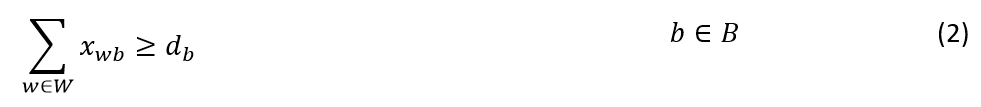

In [58]:
Image(filename='Constraint2.png')

In [59]:
for b in Bars:
    prob += lpSum(X[w][b] for w in Warehouses) >= Demand[b]

### 7. Solve problem

In [60]:
prob.solve()

1

### 8. Print problem status

In [61]:
print("Problem status is", LpStatus[prob.status])

Problem status is Optimal


### 9. Print decision variables which take value in the solution

In [62]:
for v in prob.variables():
    if v.varValue > 0.1:
        print(v.name, "=", v.varValue)

x_A_1 = 800.0
x_A_4 = 200.0
x_B_2 = 900.0
x_B_3 = 1800.0
x_C_1 = 700.0
x_C_5 = 700.0


In [63]:
print(prob.variables())

[x_A_1, x_A_2, x_A_3, x_A_4, x_A_5, x_B_1, x_B_2, x_B_3, x_B_4, x_B_5, x_C_1, x_C_2, x_C_3, x_C_4, x_C_5]


### 10. Print objective function

In [64]:
print("Total tranportation cost is equal to", value(prob.objective))

Total tranportation cost is equal to 10400.0


In [65]:
print(prob)

Beer_Distribution_Problem:
MINIMIZE
2*x_A_1 + 4*x_A_2 + 5*x_A_3 + 2*x_A_4 + 1*x_A_5 + 3*x_B_1 + 1*x_B_2 + 3*x_B_3 + 2*x_B_4 + 3*x_B_5 + 2*x_C_1 + 4*x_C_2 + 5*x_C_3 + 2*x_C_4 + 1*x_C_5 + 0
SUBJECT TO
_C1: x_A_1 + x_A_2 + x_A_3 + x_A_4 + x_A_5 <= 1000

_C2: x_B_1 + x_B_2 + x_B_3 + x_B_4 + x_B_5 <= 3000

_C3: x_C_1 + x_C_2 + x_C_3 + x_C_4 + x_C_5 <= 2000

_C4: x_A_1 + x_B_1 + x_C_1 >= 1500

_C5: x_A_2 + x_B_2 + x_C_2 >= 900

_C6: x_A_3 + x_B_3 + x_C_3 >= 1800

_C7: x_A_4 + x_B_4 + x_C_4 >= 200

_C8: x_A_5 + x_B_5 + x_C_5 >= 700

VARIABLES
0 <= x_A_1 Integer
0 <= x_A_2 Integer
0 <= x_A_3 Integer
0 <= x_A_4 Integer
0 <= x_A_5 Integer
0 <= x_B_1 Integer
0 <= x_B_2 Integer
0 <= x_B_3 Integer
0 <= x_B_4 Integer
0 <= x_B_5 Integer
0 <= x_C_1 Integer
0 <= x_C_2 Integer
0 <= x_C_3 Integer
0 <= x_C_4 Integer
0 <= x_C_5 Integer

